### Lecture 1: The Learning Problem


Practical:

(Summary-Implementing a Basic Learning System)

-Simulate a 2D dataset with two classes.

-Implement the Perceptron Learning Algorithm (PLA) to separate the classes.

-Visualize the data points and the learned decision boundary.

In [1]:
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

[[-1.65089282 -1.17198905]
 [-0.19190847  0.82339208]
 [-3.10964048 -0.64455119]
 [ 0.68033265 -1.04323554]
 [ 2.39337615  0.88156625]
 [ 0.63209043  3.88348166]
 [ 0.66803333 -0.91203434]
 [ 0.11299355  0.4113768 ]
 [ 0.75782246 -0.93009445]
 [-1.33449082 -0.43734997]]
[0 1 1 0 1 1 0 1 0 0]


<Axes: xlabel='x1', ylabel='x2'>

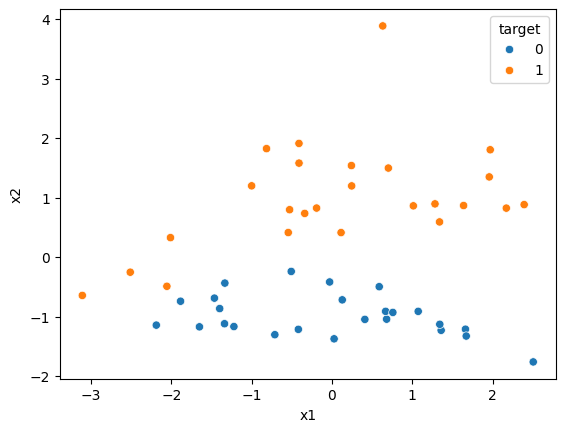

In [2]:
# Simulate a 2D dataset with two classes

X,y=datasets.make_classification(n_samples=50,n_features=2,n_classes=2,n_informative=2,n_redundant=0,n_repeated=0,n_clusters_per_class=2)
print(X[:10,:])
print(y[:10])
df=pd.DataFrame(X,columns=["x1","x2"])
df["target"]=pd.Series(y)
df.head()
sb.scatterplot(data=df,x="x1",y="x2",hue="target")



In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [4]:
X_test.shape

(10, 2)

In [5]:
X_train=X_train.reshape(len(X_train),1*2)
X_test=X_test.reshape(len(X_test),1*2)
print(X_train.shape,X_test.shape)


(40, 2) (10, 2)


In [6]:
#Implement the Perceptron Learning Algorithm (PLA) to separate the classes.
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [7]:
model=keras.Sequential()

In [8]:
model.add(keras.Input(shape=(2,)))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9292 - loss: 0.4366 
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9292 - loss: 0.4284
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9187 - loss: 0.4407
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9187 - loss: 0.4365
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9187 - loss: 0.4356
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9187 - loss: 0.4360
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9292 - loss: 0.4237
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9396 - loss: 0.4219
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9187 - loss: 0.4323
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9187 - loss: 0.4359
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9187 - loss: 0.4388
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9292 - loss: 0.4190


In [10]:
model.weights

[<Variable path=sequential/dense/kernel, shape=(2, 1), dtype=float32, value=[[0.25740218]
  [0.7939443 ]]>,
 <Variable path=sequential/dense/bias, shape=(1,), dtype=float32, value=[-0.03153889]>]

In [11]:
model.layers[0].get_weights()

[array([[0.25740218],
        [0.7939443 ]], dtype=float32),
 array([-0.03153889], dtype=float32)]

In [21]:
y_pred=model.predict(X_test)
[1 if x>=0.5 else 0 for x in y_pred]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


[1, 0, 0, 1, 1, 1, 0, 1, 0, 1]